In [1]:
import tifffile
import numpy as np
import time
import pickle

import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import img_as_float
from skimage.exposure import rescale_intensity

import os

In [2]:
in_dir = r'Y:\coskun-lab\Zhou\4_HCR\20210324_11gene\UC\00_registered_images\new\014'

In [6]:
cytokine_stack = tifffile.imread(os.path.join(in_dir, f'cycle2_il8_il6_ccl11_014.tif'))
cytokine_stack = cytokine_stack.reshape(cytokine_stack.shape[1], cytokine_stack.shape[2], cytokine_stack.shape[3])
mask = tifffile.imread(os.path.join(in_dir, r'cell1_Mask_2.tif'))

In [7]:
cytokine_stack.shape

(1999, 1662, 4)

In [8]:
il8 = img_as_float(cytokine_stack[:,:,1])
il6 = img_as_float(cytokine_stack[:,:,2])
ccl11 = img_as_float(cytokine_stack[:,:,3])

In [9]:
adjusted_dir = r'Y:\\coskun-lab\\Zhou\\4_HCR\\20210324_11gene\\UC\\00_registered_images\\figures\\014\\masked_adjusted'
adjusted_il8 = tifffile.imread(os.path.join(adjusted_dir, r'03_il8.tif'))
adjusted_il6 = tifffile.imread(os.path.join(adjusted_dir, r'04_il6.tif'))
adjusted_ccl11 = tifffile.imread(os.path.join(adjusted_dir, r'05_ccl11.tif'))

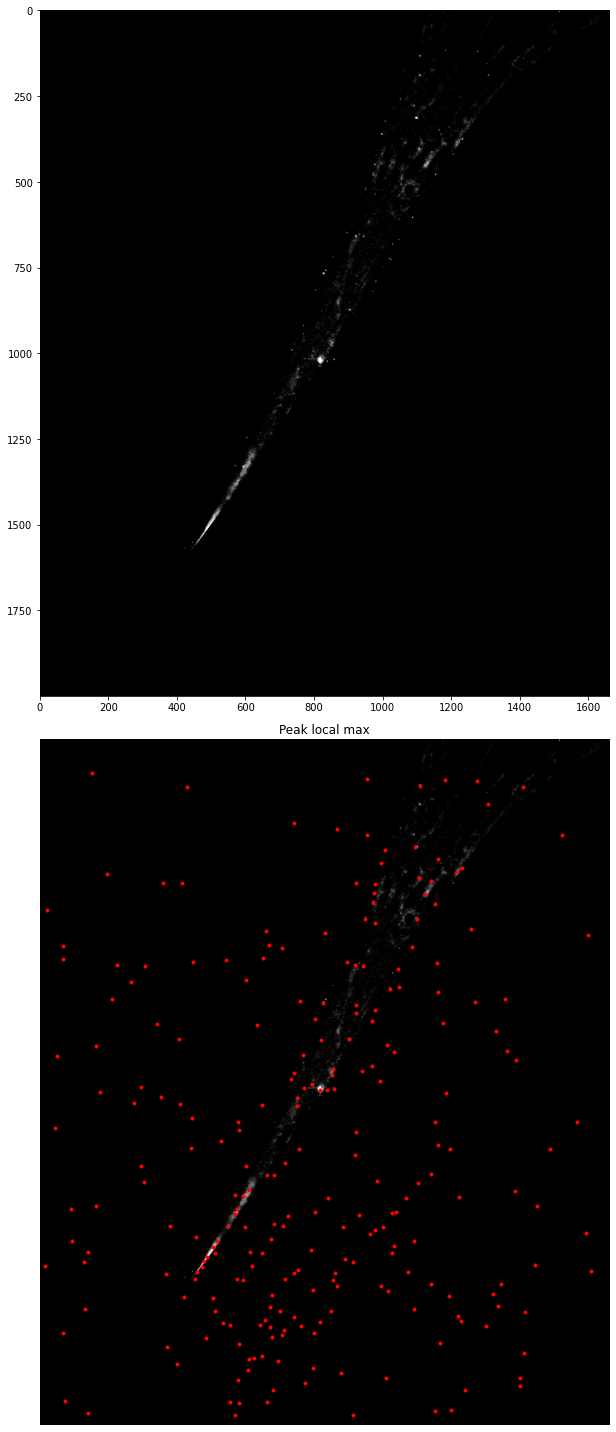

In [12]:
il8_coordinates = peak_local_max(il8, threshold_rel=0.15, min_distance=10)

fig, axes = plt.subplots(2, 1, figsize=(40, 20))
ax = axes.ravel()

ax[0].imshow(adjusted_il8, cmap=plt.cm.gray)
ax[0].autoscale(False)

ax[1].imshow(adjusted_il8, cmap=plt.cm.gray)
ax[1].autoscale(False)
ax[1].plot(il8_coordinates[:, 1], il8_coordinates[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Peak local max')
fig.tight_layout()

plt.show()

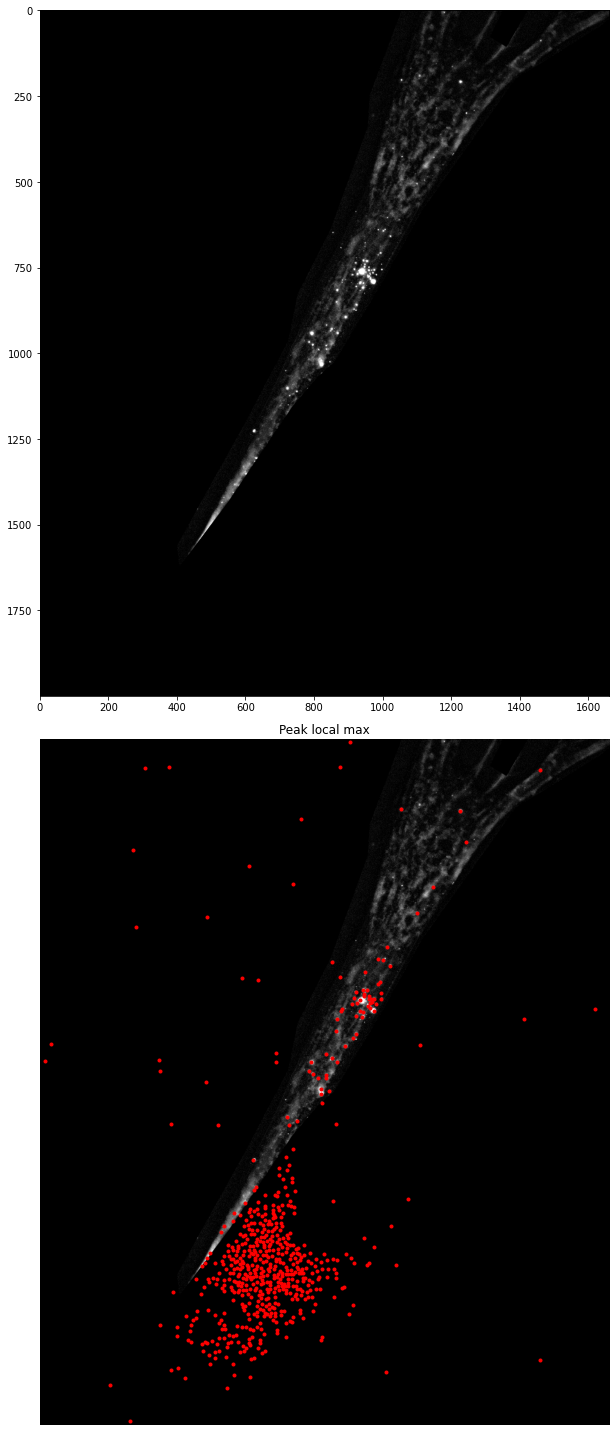

In [13]:
il6_coordinates = peak_local_max(il6, threshold_rel=0.16, min_distance=5)

fig, axes = plt.subplots(2, 1, figsize=(40, 20))
ax = axes.ravel()

ax[0].imshow(adjusted_il6, cmap=plt.cm.gray)
ax[0].autoscale(False)

ax[1].imshow(adjusted_il6, cmap=plt.cm.gray)
ax[1].autoscale(False)
ax[1].plot(il6_coordinates[:, 1], il6_coordinates[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Peak local max')
fig.tight_layout()

plt.show()

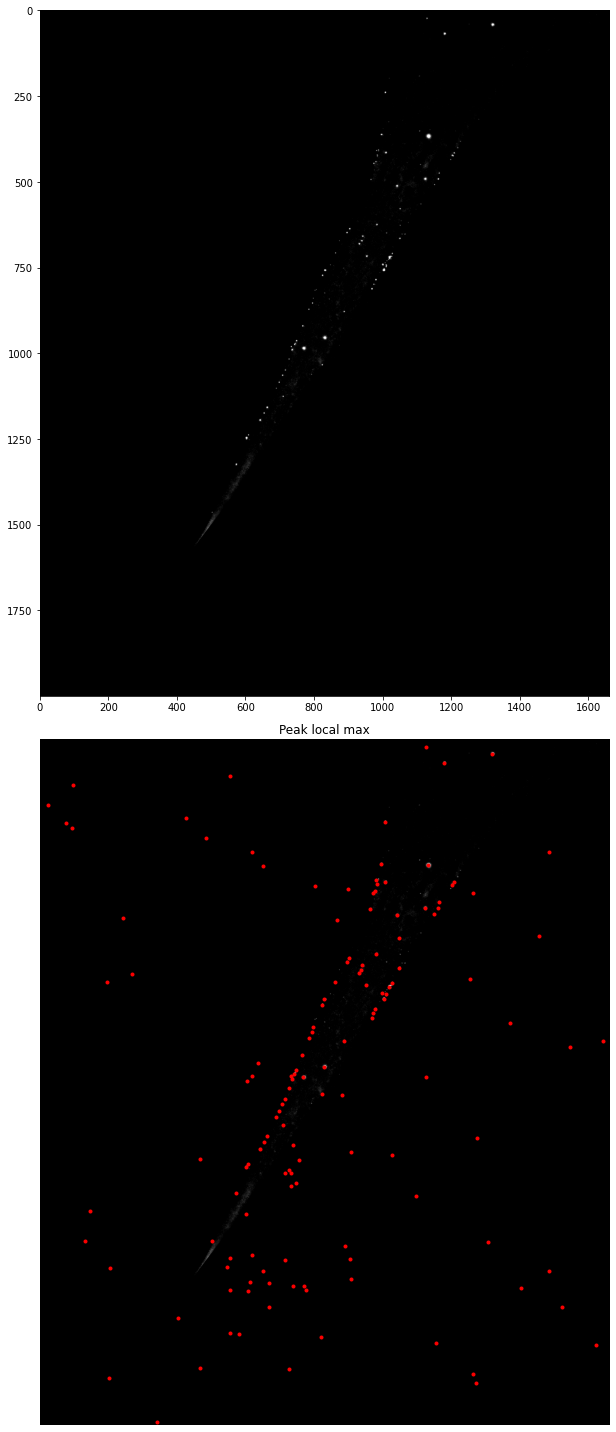

In [14]:
ccl11_coordinates = peak_local_max(ccl11, threshold_rel=0.07, min_distance=5)

fig, axes = plt.subplots(2, 1, figsize=(40, 20))
ax = axes.ravel()

ax[0].imshow(adjusted_ccl11, cmap=plt.cm.gray)
ax[0].autoscale(False)

ax[1].imshow(adjusted_ccl11, cmap=plt.cm.gray)
ax[1].autoscale(False)
ax[1].plot(ccl11_coordinates[:, 1], ccl11_coordinates[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Peak local max')
fig.tight_layout()

plt.show()

In [15]:
mask = tifffile.imread(os.path.join(in_dir, r'cell1_Mask_2.tif'))
mask = mask > 0
# mask = mask.reshape(mask.shape[1], mask.shape[2])

In [16]:
masked_il8 = []
masked_il6 = []
masked_ccl11 = []

for i in range(il8_coordinates.shape[0]):
    if mask[il8_coordinates[i,0],il8_coordinates[i,1]]:
        masked_il8.append([il8_coordinates[i,0],il8_coordinates[i,1]])
masked_il8 = np.array(masked_il8)

for i in range(il6_coordinates.shape[0]):
    if mask[il6_coordinates[i,0],il6_coordinates[i,1]]:
        masked_il6.append([il6_coordinates[i,0],il6_coordinates[i,1]])
masked_il6 = np.array(masked_il6)

for i in range(ccl11_coordinates.shape[0]):
    if mask[ccl11_coordinates[i,0],ccl11_coordinates[i,1]]:
        masked_ccl11.append([ccl11_coordinates[i,0],ccl11_coordinates[i,1]])
masked_ccl11 = np.array(masked_ccl11)

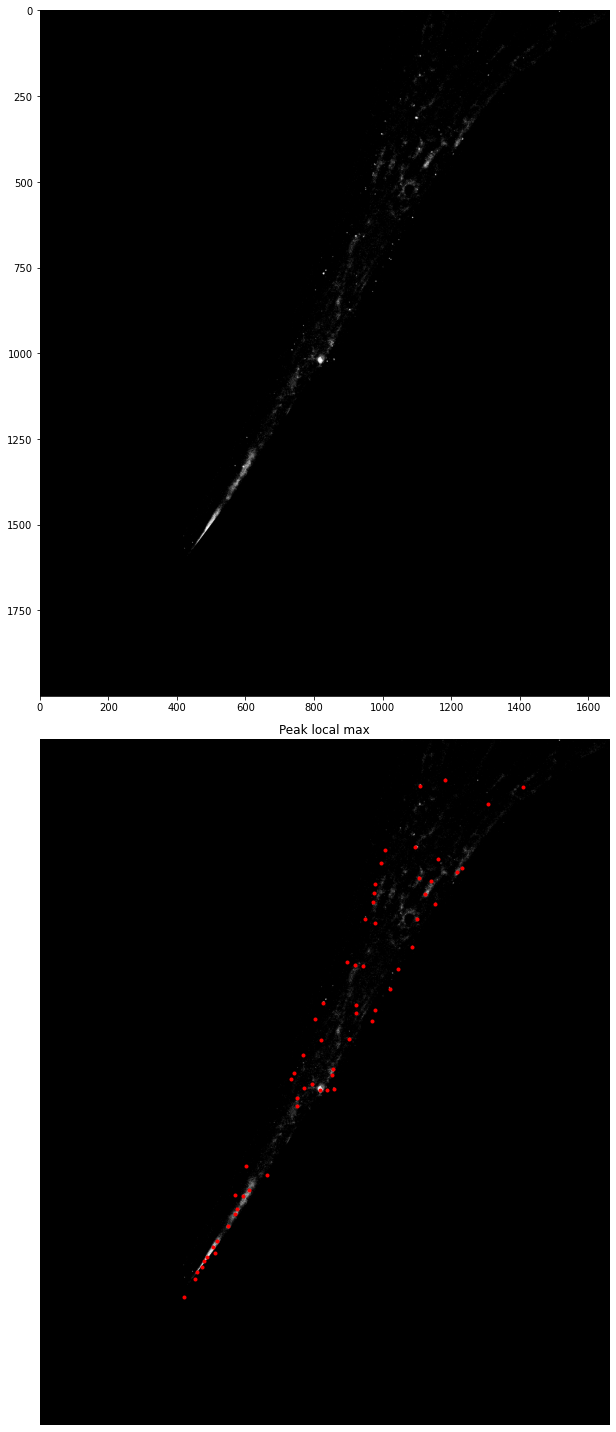

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(40, 20))
ax = axes.ravel()

ax[0].imshow(adjusted_il8, cmap=plt.cm.gray)
ax[0].autoscale(False)

ax[1].imshow(adjusted_il8, cmap=plt.cm.gray)
ax[1].autoscale(False)
ax[1].plot(masked_il8[:, 1], masked_il8[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Peak local max')
fig.tight_layout()

plt.show()

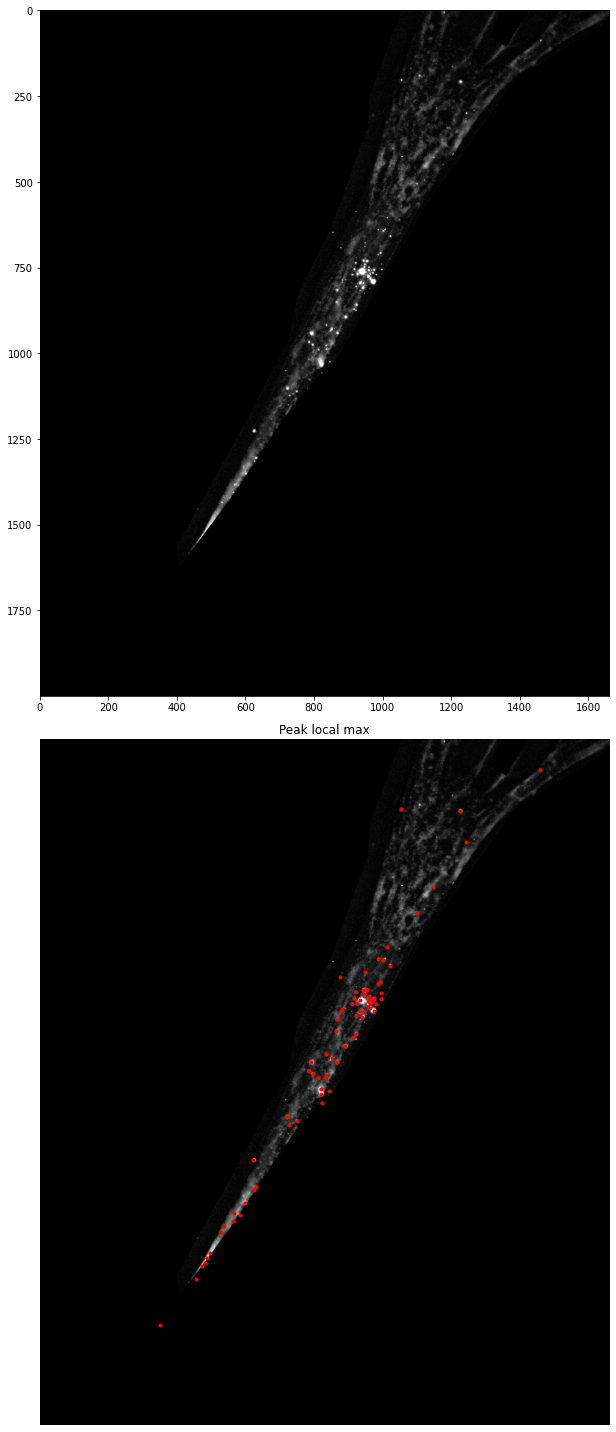

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(40, 20))
ax = axes.ravel()

ax[0].imshow(adjusted_il6, cmap=plt.cm.gray)
ax[0].autoscale(False)

ax[1].imshow(adjusted_il6, cmap=plt.cm.gray)
ax[1].autoscale(False)
ax[1].plot(masked_il6[:, 1], masked_il6[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Peak local max')
fig.tight_layout()

plt.show()

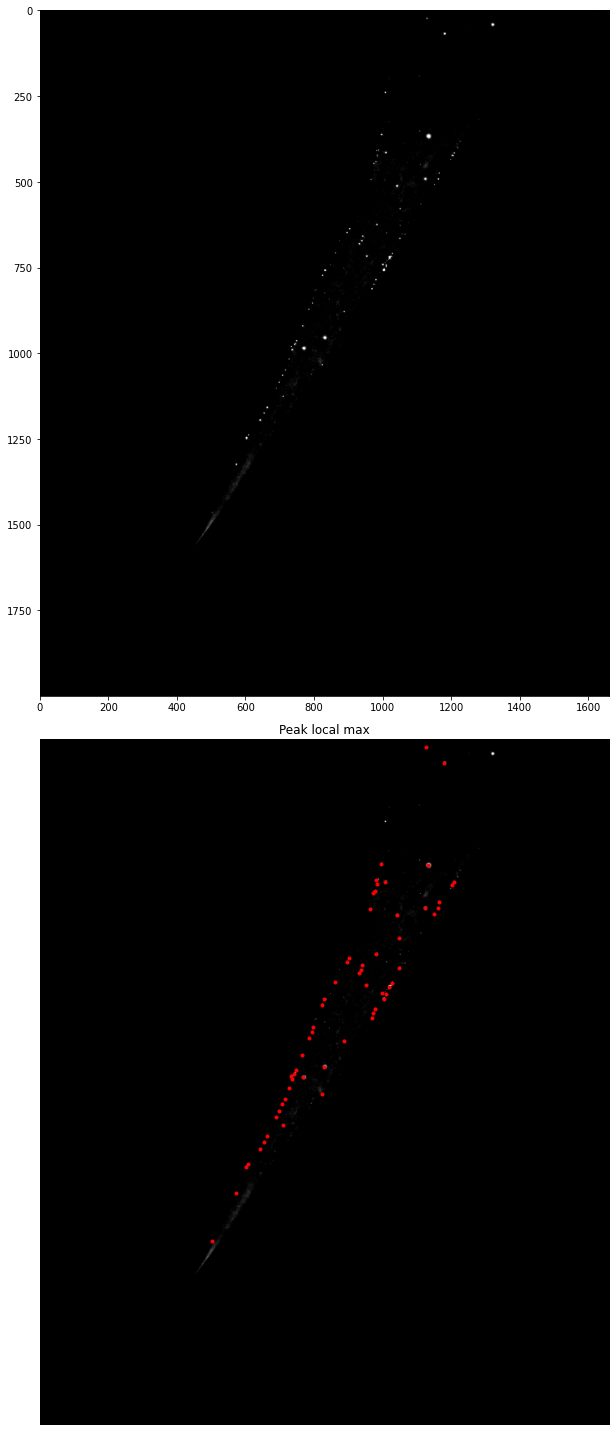

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(40, 20))
ax = axes.ravel()

ax[0].imshow(adjusted_ccl11, cmap=plt.cm.gray)
ax[0].autoscale(False)

ax[1].imshow(adjusted_ccl11, cmap=plt.cm.gray)
ax[1].autoscale(False)
ax[1].plot(masked_ccl11[:, 1], masked_ccl11[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Peak local max')
fig.tight_layout()

plt.show()

In [20]:
with open(os.path.join(in_dir, 'exp1_uc_cytokine_locations_014.pkl'), 'wb') as f:
    pickle.dump({'il8': masked_il8, 'il6': masked_il6, 'ccl11': masked_ccl11}, f)